# Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

 You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(Url,usecols=['Pclass','Sex','Age','SibSp','Parch','Fare','Survived'])

In [3]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [4]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#sex column is having a categorical values so perforn dummy encoding
titanic=pd.get_dummies(titanic)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [6]:
titanic.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
dtype: int64

age columns are having 177 missing values

In [7]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [8]:
titanic['Age'].isnull().sum()

0

In [9]:
titanic.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
dtype: int64

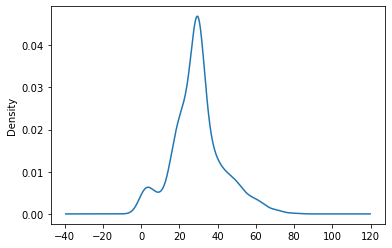

In [10]:
titanic['Age'].plot.kde()

In [11]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

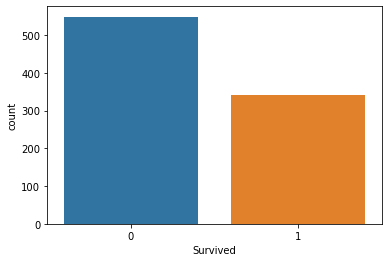

In [12]:
import seaborn as sns
sns.countplot(titanic['Survived'])

In [13]:
#titanic['Pclass'].value_counts()

In [14]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

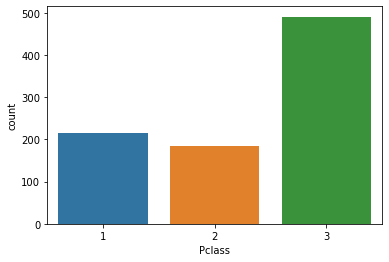

In [15]:
sns.countplot(titanic['Pclass'])

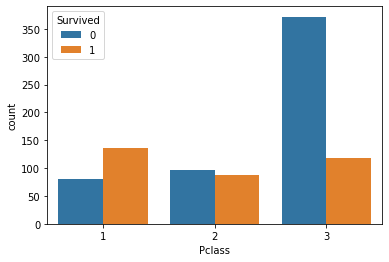

In [16]:
sns.countplot(titanic['Pclass'],hue=(titanic['Survived']))

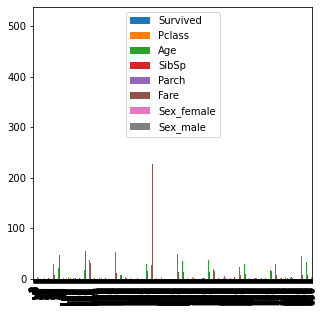

In [17]:
titanic.plot(figsize=(5,5),kind='bar')

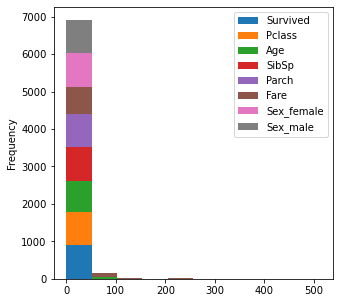

In [18]:
titanic.plot(figsize=(5,5),kind='hist',stacked=True)

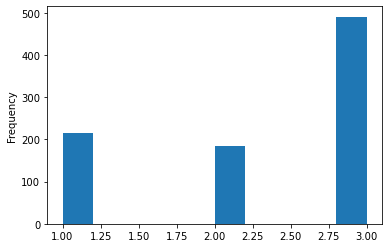

In [19]:
titanic['Pclass'].plot.hist()

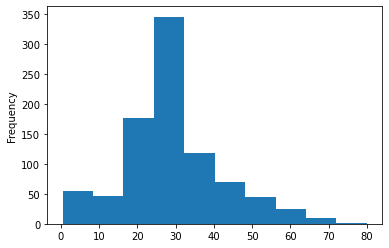

In [20]:
titanic['Age'].plot.hist()

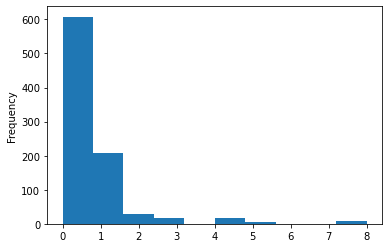

In [21]:
titanic['SibSp'].plot.hist()

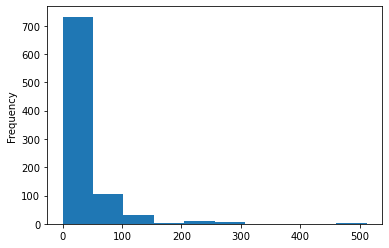

In [22]:
titanic['Fare'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016A02110F40>,
      dtype=object)

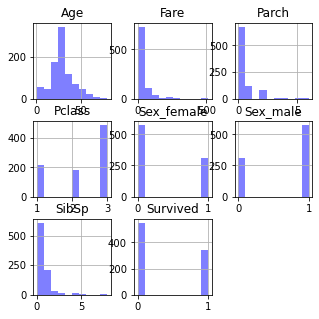

In [23]:
titanic.hist(color='b',alpha=0.5,figsize=(5,5))

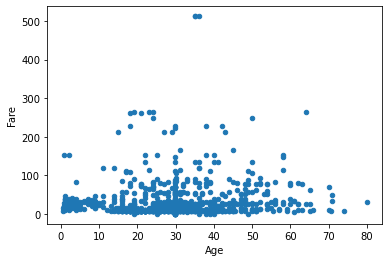

In [24]:
titanic.plot.scatter(x='Age',y='Fare')

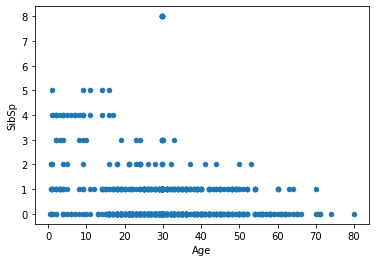

In [25]:
titanic.plot.scatter(x='Age',y='SibSp')

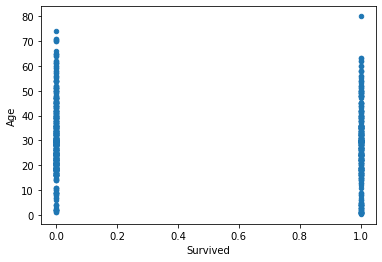

In [26]:
titanic.plot.scatter(x='Survived',y='Age')

In [27]:
corr=titanic.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.543351,-0.543351
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,0.131900
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.084153
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.114631
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.245489
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,-0.182333
Sex_female,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,-1.000000
Sex_male,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-1.000000,1.000000


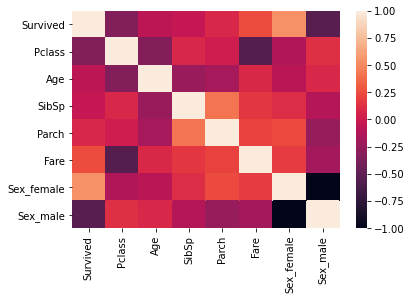

In [28]:
sns.heatmap(corr)

In [29]:
y=titanic['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [30]:
y=pd.DataFrame(y,columns=['Survived'])
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [33]:
x=titanic.drop('Survived',axis=1)

In [35]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.000000,1,0,7.2500,0,1
1,1,38.000000,1,0,71.2833,1,0
2,3,26.000000,0,0,7.9250,1,0
3,1,35.000000,1,0,53.1000,1,0
4,3,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1
887,1,19.000000,0,0,30.0000,1,0
888,3,29.699118,1,2,23.4500,1,0
889,1,26.000000,0,0,30.0000,0,1


In [85]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state=350)  

In [86]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [87]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=350) 
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=350)

In [88]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [89]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
conf_mat= confusion_matrix(y_test, y_pred)  

In [90]:
conf_mat

array([[137,  28],
       [ 24,  79]], dtype=int64)

In [91]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [92]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)*100
Accuracy

80.59701492537313

In [93]:
# Precison
Precision = true_positive/(true_positive+false_positive)*100
Precision

83.03030303030303

In [94]:
# Recall
Recall = true_positive/(true_positive+false_negative)*100
Recall

85.09316770186336

In [95]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

84.04907975460124